# Crop Recommendation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

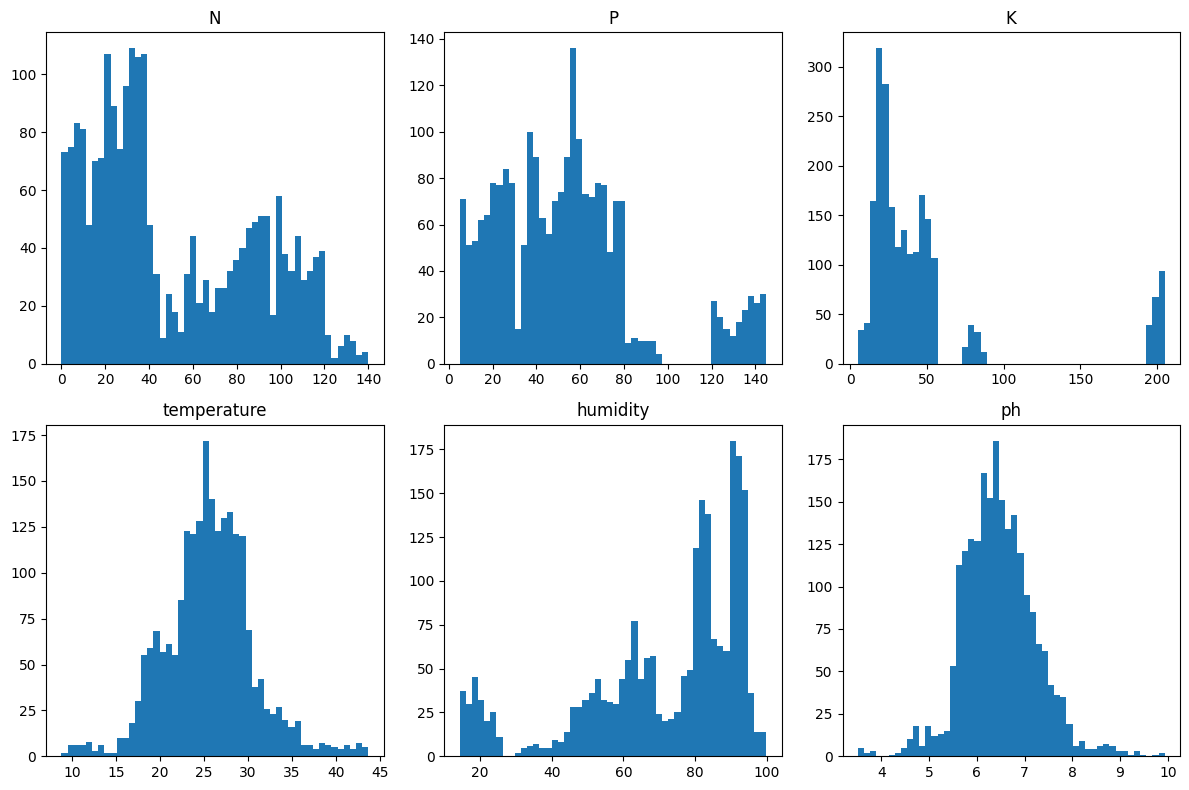

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8), dpi=100)
cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph']
i = 0
for ax in axs.flatten():
    ax.hist(df[cols[i]], bins=50)
    ax.set_title(cols[i])
    i += 1
plt.tight_layout()
plt.show()

In [7]:
stats = df.describe().loc[['mean', 'std']]
stats

,N,P,K,temperature,humidity,ph,rainfall
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389


In [8]:
from scipy.stats import zscore

df[cols] = df[cols].apply(zscore)
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2200.000000
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,103.463655
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,54.958389
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,20.211267
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,64.551686
50%,-3.671690e-01,-7.164472e-02,-3.189225e-01,-3.466729e-03,4.039475e-01,-5.742697e-02,94.867624
75%,9.130086e-01,4.438444e-01,1.680429e-02,5.817982e-01,8.296508e-01,5.869540e-01,124.267508
max,2.423483e+00,2.778707e+00,3.097591e+00,3.567190e+00,1.280400e+00,4.478912e+00,298.560117


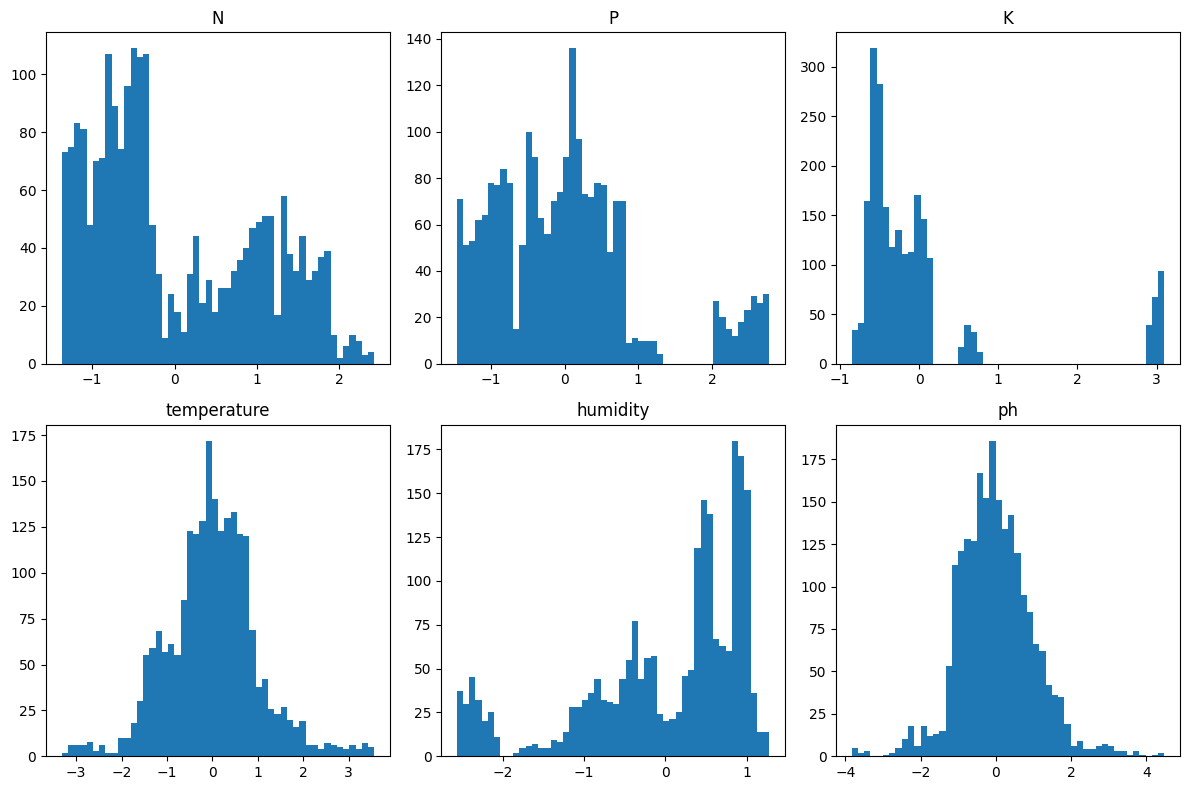

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8), dpi=100)
cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph']
i = 0
for ax in axs.flatten():
    ax.hist(df[cols[i]], bins=50)
    ax.set_title(cols[i])
    i += 1
plt.tight_layout()
plt.show()

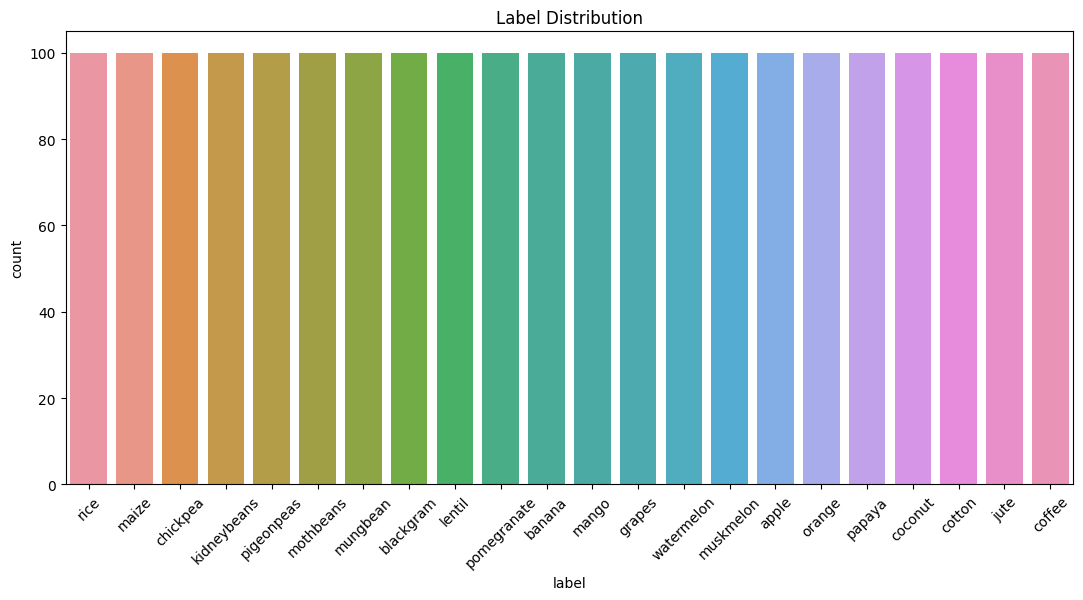

In [10]:
plt.figure(figsize=(13, 6), dpi=100)
sns.countplot(data=df, x='label')
plt.xticks(rotation=45)
plt.title('Label Distribution')
plt.show()

## Model Building

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = np.sort(df['label'].unique())
label_map = {}
for idx, i in enumerate(x):
    label_map[i] = idx
label_map

{'apple': 0,
 'banana': 1,
 'blackgram': 2,
 'chickpea': 3,
 'coconut': 4,
 'coffee': 5,
 'cotton': 6,
 'grapes': 7,
 'jute': 8,
 'kidneybeans': 9,
 'lentil': 10,
 'maize': 11,
 'mango': 12,
 'mothbeans': 13,
 'mungbean': 14,
 'muskmelon': 15,
 'orange': 16,
 'papaya': 17,
 'pigeonpeas': 18,
 'pomegranate': 19,
 'rice': 20,
 'watermelon': 21}

In [13]:
X = df.drop('label', axis=1).values
y = df['label'].map(label_map).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [15]:
df['label'].nunique(), df.shape

(22, (2200, 8))

In [16]:
model = keras.Sequential([
    layers.Dense(units=128, input_shape=(7,), activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=22, activation='softmax'),
])
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 22)                726       
                                                                 
Total params: 16,246
Trainable params: 16,246
Non-trainable params: 0
_________________________________________________________________


In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1782, 7), (1782,), (220, 7), (220,))

In [18]:
model.compile(
    optimizer=keras.optimizers.Adam(), 
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'], 
)

history = model.fit(x=X_train, y=y_train, 
                    batch_size=32,
                    epochs=100, 
                    validation_data=(X_test, y_test))

Epoch 1/100
56/56 [==============================] - 1s 8ms/step - loss: 3.1861 - accuracy: 0.0483 - val_loss: 2.9550 - val_accuracy: 0.0818
Epoch 2/100
56/56 [==============================] - 0s 6ms/step - loss: 2.8875 - accuracy: 0.1055 - val_loss: 2.8390 - val_accuracy: 0.1500
Epoch 3/100
56/56 [==============================] - 0s 5ms/step - loss: 2.6998 - accuracy: 0.1627 - val_loss: 2.5806 - val_accuracy: 0.2273
Epoch 4/100
56/56 [==============================] - 0s 5ms/step - loss: 2.4139 - accuracy: 0.2480 - val_loss: 2.2666 - val_accuracy: 0.3500
Epoch 5/100
56/56 [==============================] - 0s 5ms/step - loss: 2.0340 - accuracy: 0.3620 - val_loss: 1.7627 - val_accuracy: 0.4364
Epoch 6/100
56/56 [==============================] - 0s 5ms/step - loss: 1.5628 - accuracy: 0.5000 - val_loss: 1.3396 - val_accuracy: 0.5818
Epoch 7/100
56/56 [==============================] - 0s 5ms/step - loss: 1.2855 - accuracy: 0.5769 - val_loss: 1.2629 - val_accuracy: 0.5591
Epoch 8/100
5

Epoch 59/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0892 - accuracy: 0.9624 - val_loss: 0.1152 - val_accuracy: 0.9455
Epoch 60/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0759 - accuracy: 0.9708 - val_loss: 0.1178 - val_accuracy: 0.9455
Epoch 61/100
56/56 [==============================] - 0s 6ms/step - loss: 0.1133 - accuracy: 0.9512 - val_loss: 0.1302 - val_accuracy: 0.9591
Epoch 62/100
56/56 [==============================] - 0s 6ms/step - loss: 0.1265 - accuracy: 0.9562 - val_loss: 0.1487 - val_accuracy: 0.9364
Epoch 63/100
56/56 [==============================] - 0s 5ms/step - loss: 0.1071 - accuracy: 0.9579 - val_loss: 0.0977 - val_accuracy: 0.9636
Epoch 64/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0803 - accuracy: 0.9686 - val_loss: 0.1012 - val_accuracy: 0.9682
Epoch 65/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0829 - accuracy: 0.9607 - val_loss: 0.1009 - val_accuracy: 0.9636
Epoch 

In [19]:
model.evaluate(X_train, y_train)

56/56 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9826


[0.04059179127216339, 0.9826038479804993]

In [20]:
model.evaluate(X_val, y_val)

7/7 [==============================] - 0s 6ms/step - loss: 0.0560 - accuracy: 0.9848


[0.05602603033185005, 0.9848484992980957]

In [21]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0686 - accuracy: 0.9727


[0.06857572495937347, 0.972727358341217]

In [22]:
model.save('model.h5')

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
print(confusion_matrix(y_train, tf.argmax(model.predict(X_train), axis=1).numpy()))

[[81  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 79  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 84  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 83  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 85  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 76  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 77  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 79  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 59  0  0  0  0  0  0  0  0  0  0  0 21  0]
 [ 0  0  0  0  0  0  0  0  0 87  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 84  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 81  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 76  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 83  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [25]:
print(confusion_matrix(y_val, tf.argmax(model.predict(X_val), axis=1).numpy()))

[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [26]:
print(confusion_matrix(y_test, tf.argmax(model.predict(X_test), axis=1).numpy()))

[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

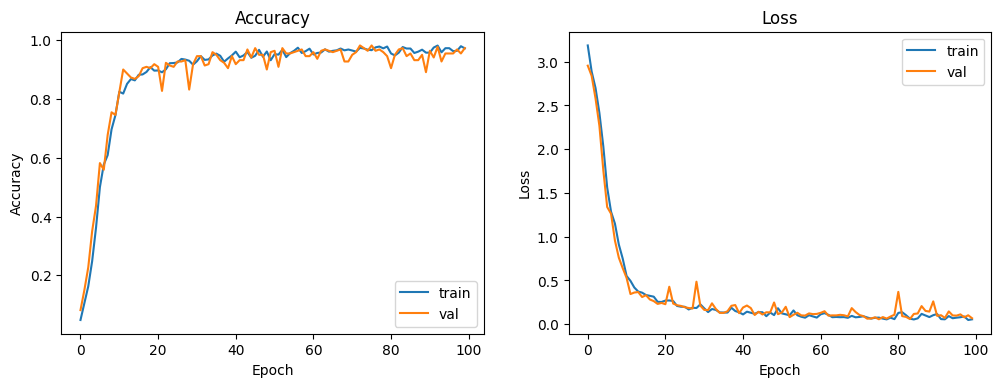

In [27]:
plt.figure(figsize=(12, 4), dpi=100)
plt.subplot(121)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(122)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()